In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
# Load the data
from IPython.display import display
df = pd.read_csv('training_raw_file.csv')
display(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10324 non-null  int64  
 1   Project Code                  10324 non-null  object 
 2   PQ #                          10324 non-null  object 
 3   PO / SO #                     10324 non-null  object 
 4   ASN/DN #                      10324 non-null  object 
 5   Country                       10324 non-null  object 
 6   Managed By                    10324 non-null  object 
 7   Fulfill Via                   10324 non-null  object 
 8   Vendor INCO Term              10324 non-null  object 
 9   Shipment Mode                 9964 non-null   object 
 10  PQ First Sent to Client Date  10324 non-null  object 
 11  PO Sent to Vendor Date        10324 non-null  object 
 12  Scheduled Delivery Date       10324 non-null  object 
 13  D

None

In [3]:
df.shape

(10324, 33)

In [4]:
df.isnull().sum()

ID                                 0
Project Code                       0
PQ #                               0
PO / SO #                          0
ASN/DN #                           0
Country                            0
Managed By                         0
Fulfill Via                        0
Vendor INCO Term                   0
Shipment Mode                    360
PQ First Sent to Client Date       0
PO Sent to Vendor Date             0
Scheduled Delivery Date            0
Delivered to Client Date           0
Delivery Recorded Date             0
Product Group                      0
Sub Classification                 0
Vendor                             0
Item Description                   0
Molecule/Test Type                 0
Brand                              0
Dosage                          1736
Dosage Form                        0
Unit of Measure (Per Pack)         0
Line Item Quantity                 0
Line Item Value                    0
Pack Price                         0
U

In [5]:
df.dropna(inplace=True)

In [6]:
%matplotlib inline
from matplotlib import pyplot as plt

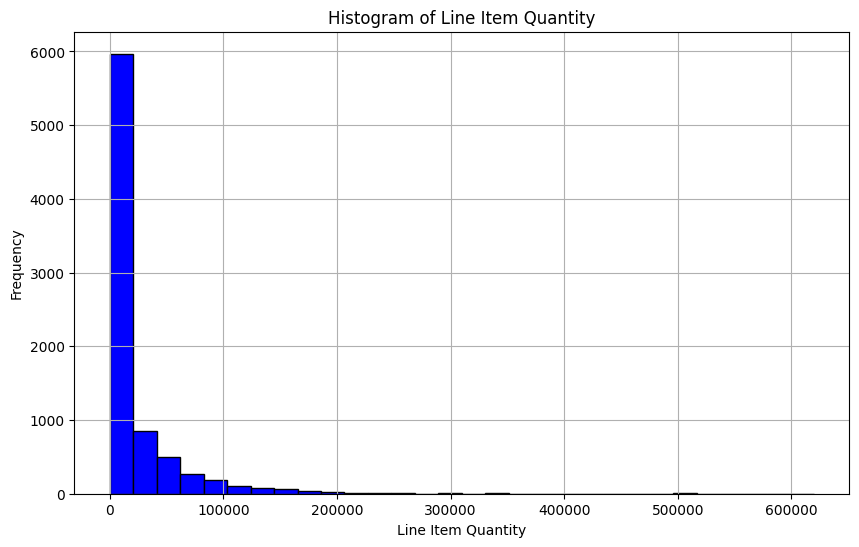

In [7]:
# Histogram of Line Item Quantity'
plt.figure(figsize=(10, 6))
plt.hist(df['Line Item Quantity'], bins=30, color='blue', edgecolor='black')
plt.title('Histogram of Line Item Quantity')
plt.xlabel('Line Item Quantity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


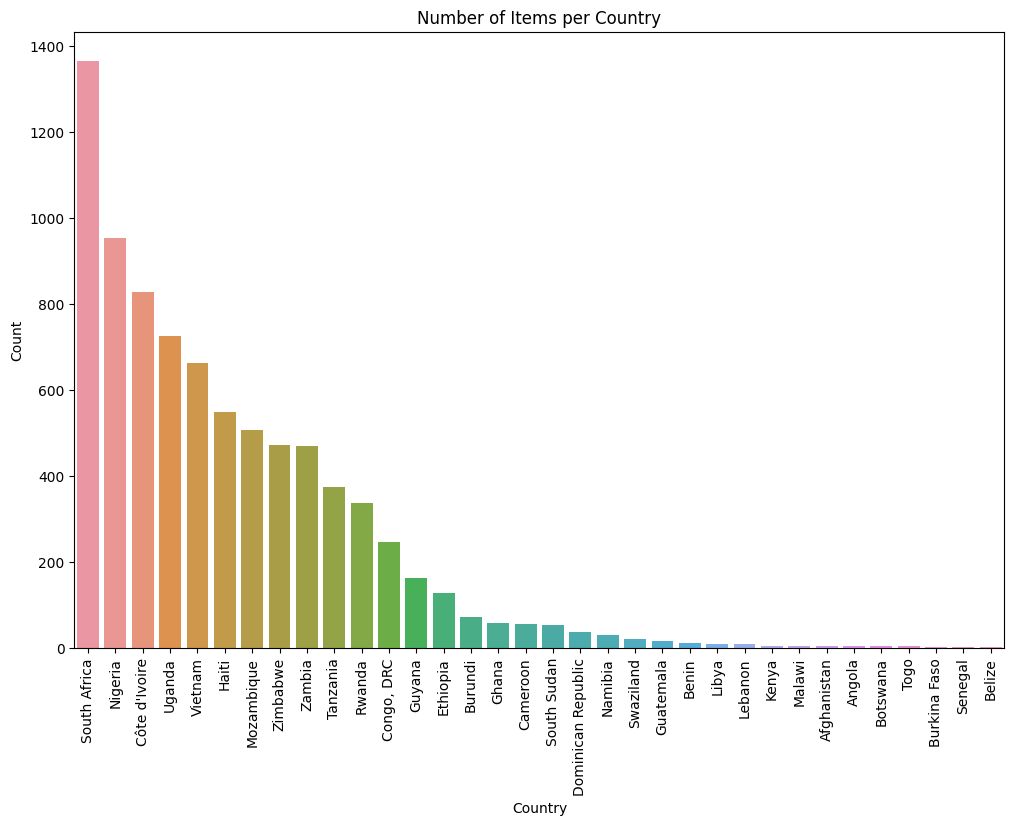

In [8]:
# Bar plot for Country
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='Country', order=df['Country'].value_counts().index)
plt.title('Number of Items per Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


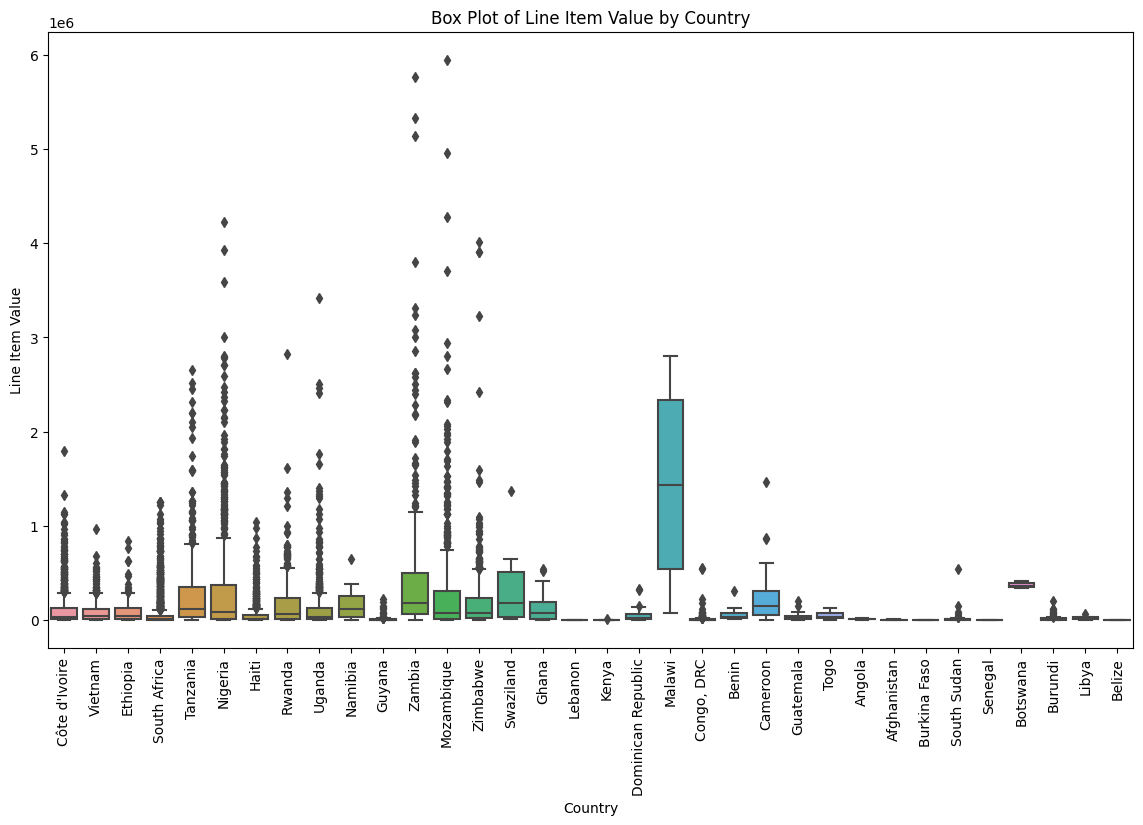

In [9]:
#Box Plot of Line Item Value by Country
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='Country', y='Line Item Value')
plt.title('Box Plot of Line Item Value by Country')
plt.xlabel('Country')
plt.ylabel('Line Item Value')
plt.xticks(rotation=90)
plt.show()


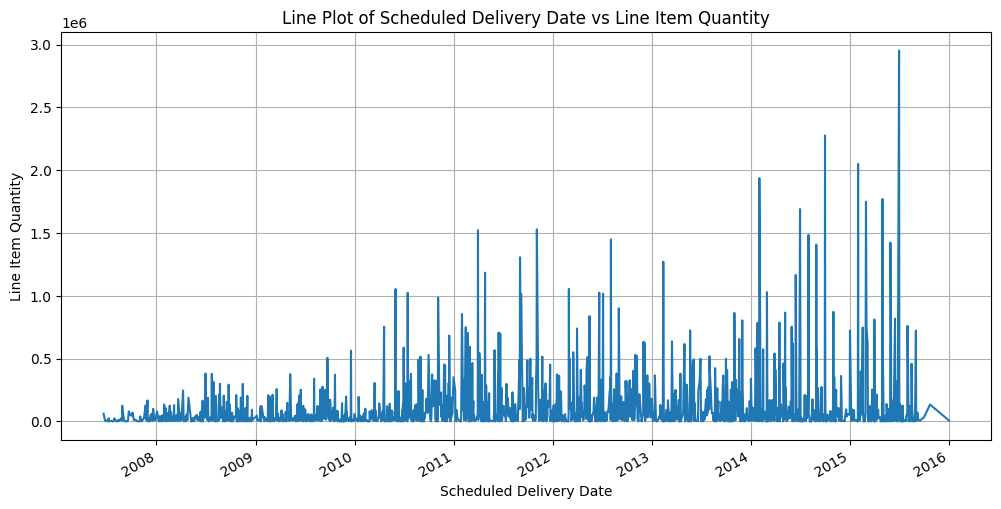

In [10]:
#Scatter Plot of Line Item Value vs Weight (Kilograms)

df['Scheduled Delivery Date'] = pd.to_datetime(df['Scheduled Delivery Date'])
plt.figure(figsize=(12, 6))
df.groupby('Scheduled Delivery Date')['Line Item Quantity'].sum().plot()
plt.title('Line Plot of Scheduled Delivery Date vs Line Item Quantity')
plt.xlabel('Scheduled Delivery Date')
plt.ylabel('Line Item Quantity')
plt.grid(True)
plt.show()


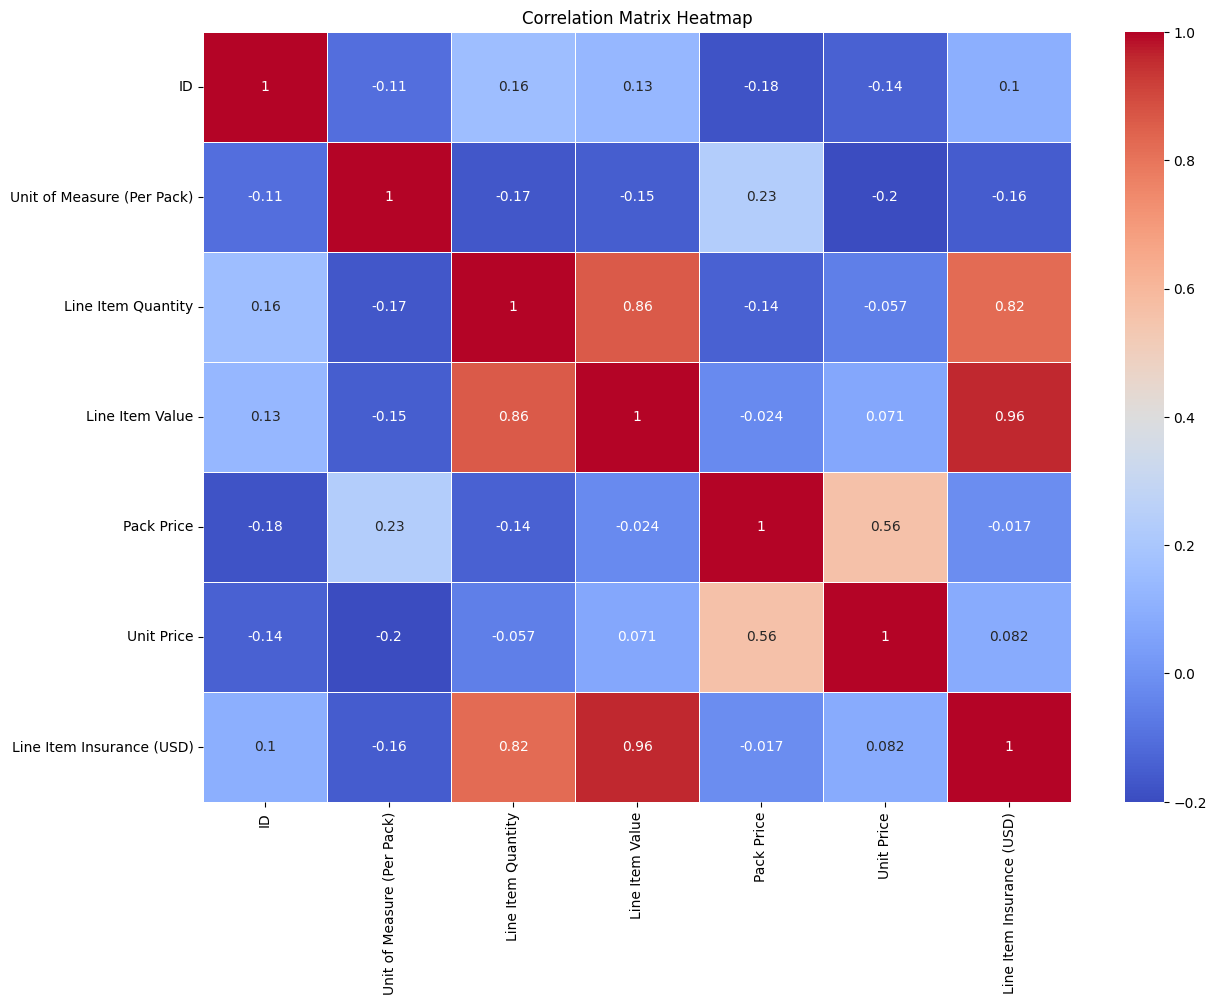

In [11]:
# Calculate the correlation matrix
corr = df.corr()
# Heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


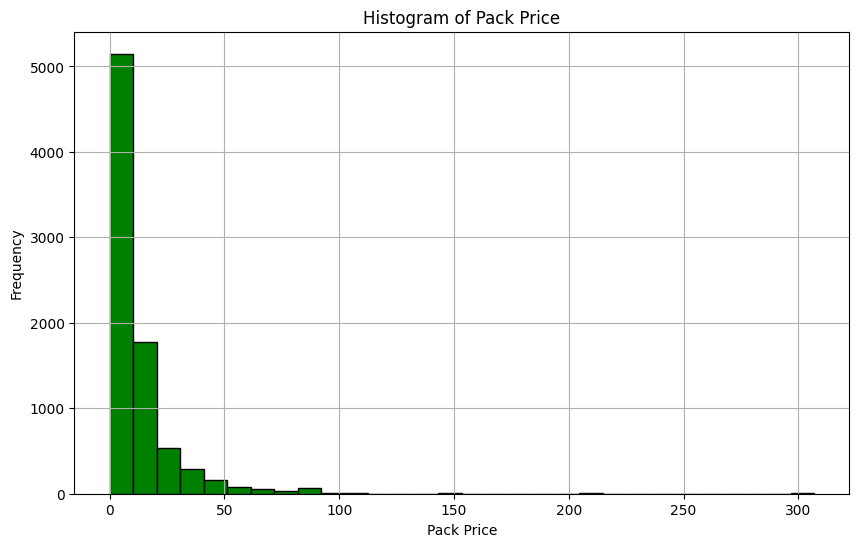

In [12]:
# Histogram for Pack Price
plt.figure(figsize=(10, 6))
plt.hist(df['Pack Price'], bins=30, color='green', edgecolor='black')
plt.title('Histogram of Pack Price')
plt.xlabel('Pack Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

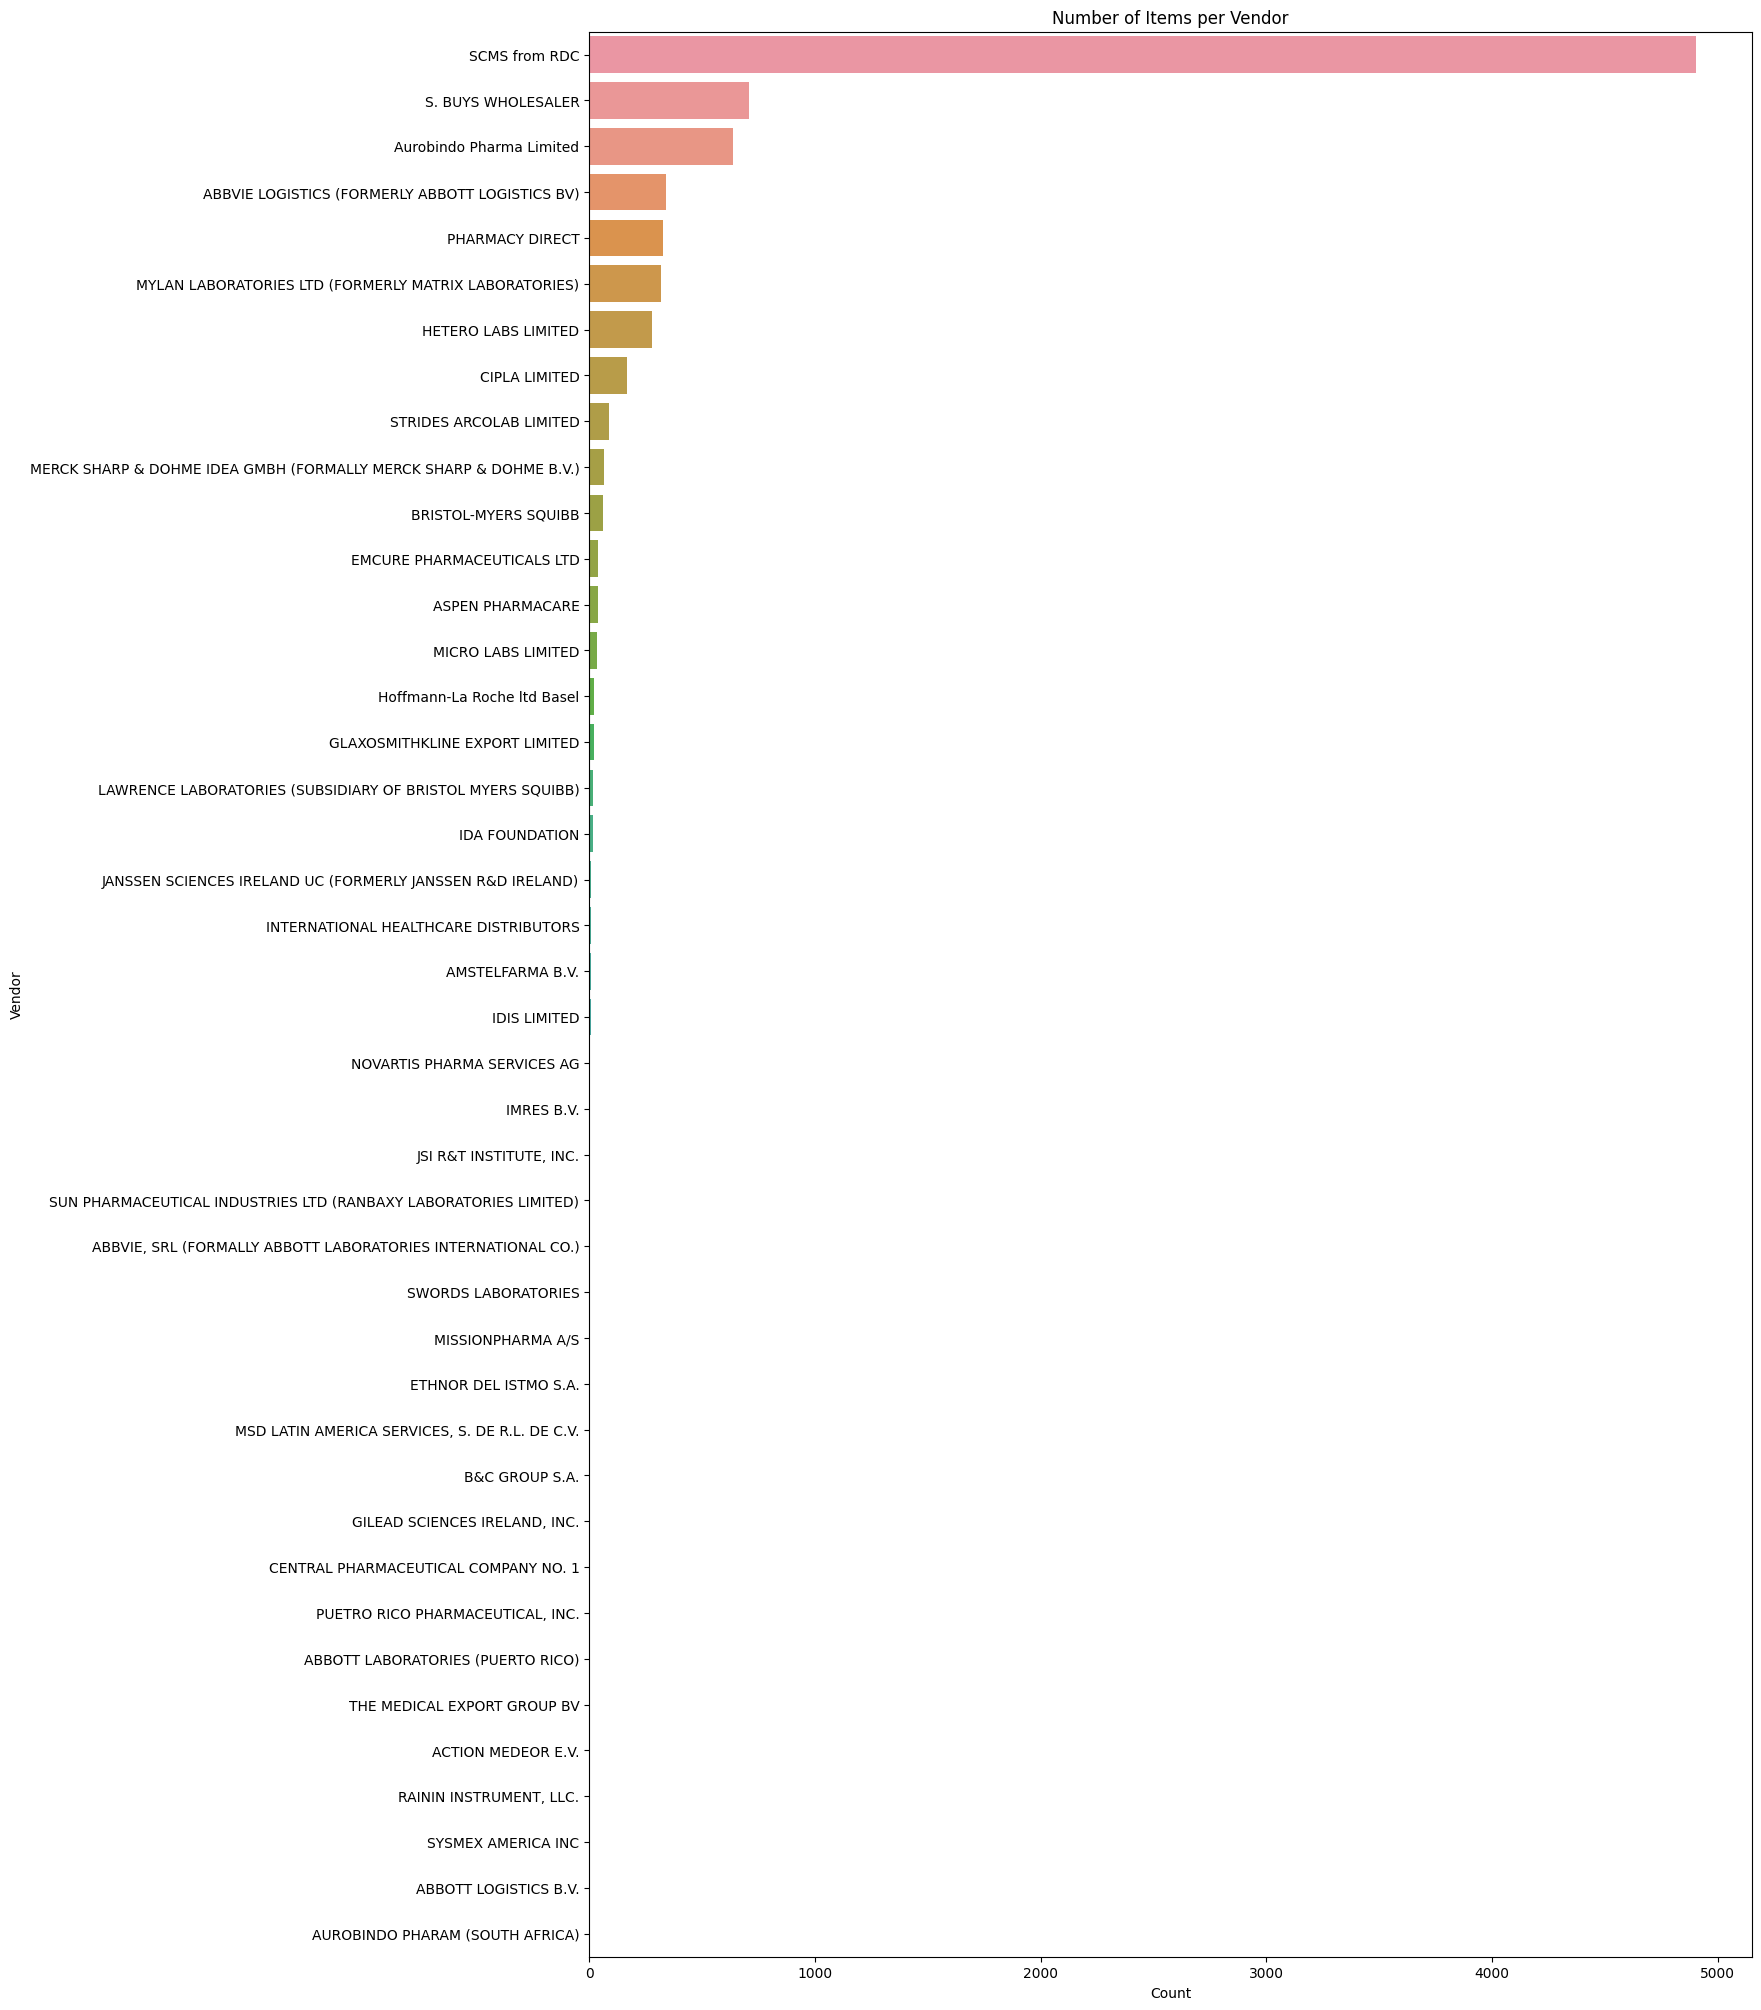

In [13]:
# Bar plot for Vendor
plt.figure(figsize=(15, 25))
sns.countplot(data=df, y='Vendor', order=df['Vendor'].value_counts().index)
plt.title('Number of Items per Vendor')
plt.xlabel('Count')
plt.ylabel('Vendor')
plt.show()


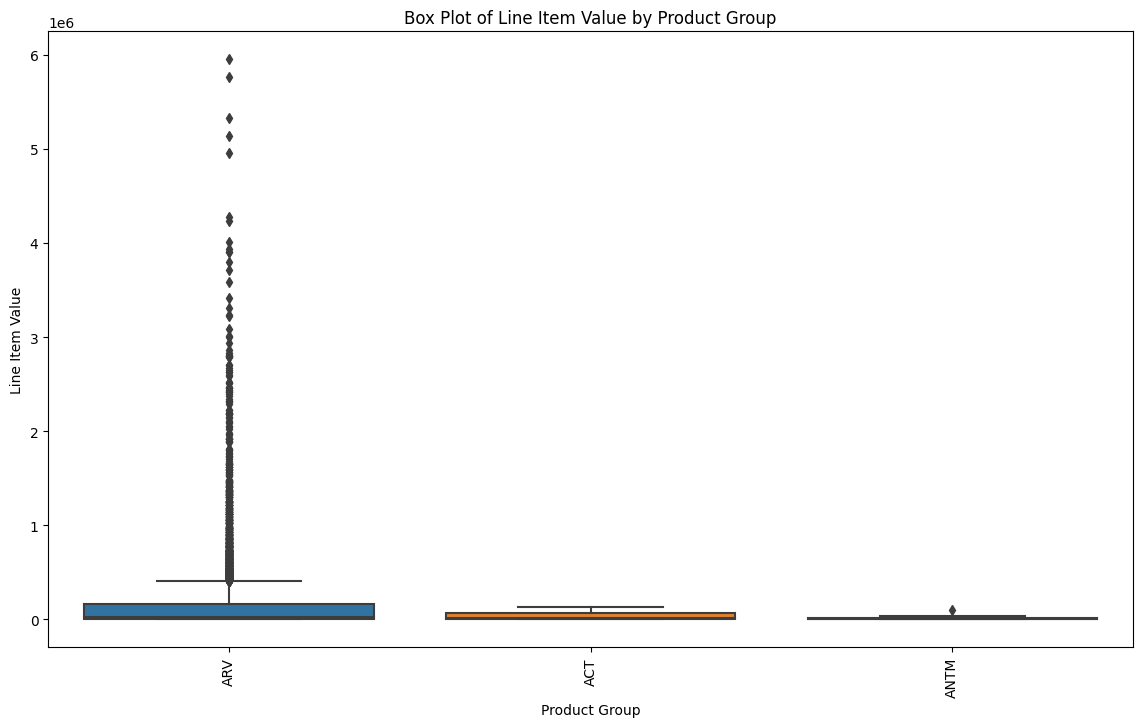

In [14]:
# Box plot for Line Item Value by Product Group
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='Product Group', y='Line Item Value')
plt.title('Box Plot of Line Item Value by Product Group')
plt.xlabel('Product Group')
plt.ylabel('Line Item Value')
plt.xticks(rotation=90)
plt.show()


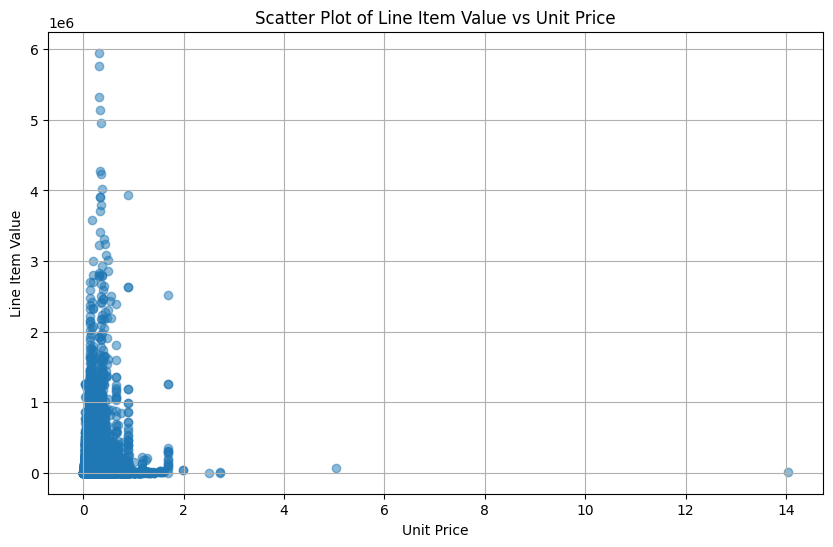

In [15]:
# Scatter plot of Line Item Value vs Unit Price
plt.figure(figsize=(10, 6))
plt.scatter(df['Unit Price'], df['Line Item Value'], alpha=0.5)
plt.title('Scatter Plot of Line Item Value vs Unit Price')
plt.xlabel('Unit Price')
plt.ylabel('Line Item Value')
plt.grid(True)
plt.show()


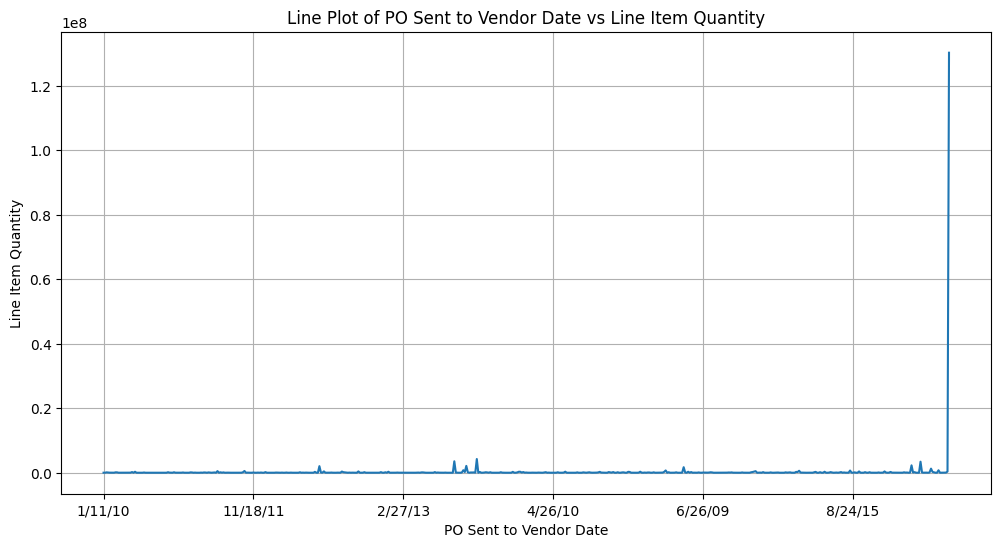

In [16]:
# Convert PO Sent to Vendor Date to datetime
plt.figure(figsize=(12, 6))
df.groupby('PO Sent to Vendor Date')['Line Item Quantity'].sum().plot()
# Line plot of PO Sent to Vendor Date vs Line Item Quantity
plt.title('Line Plot of PO Sent to Vendor Date vs Line Item Quantity')
plt.xlabel('PO Sent to Vendor Date')
plt.ylabel('Line Item Quantity')
plt.grid(True)
plt.show()


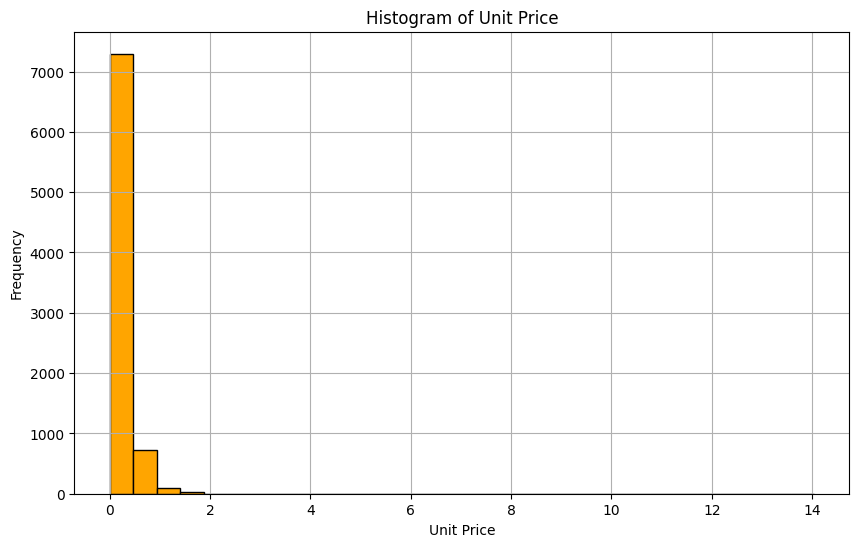

In [17]:
# Histogram for Unit Price
plt.figure(figsize=(10, 6))
plt.hist(df['Unit Price'], bins=30, color='orange', edgecolor='black')
plt.title('Histogram of Unit Price')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

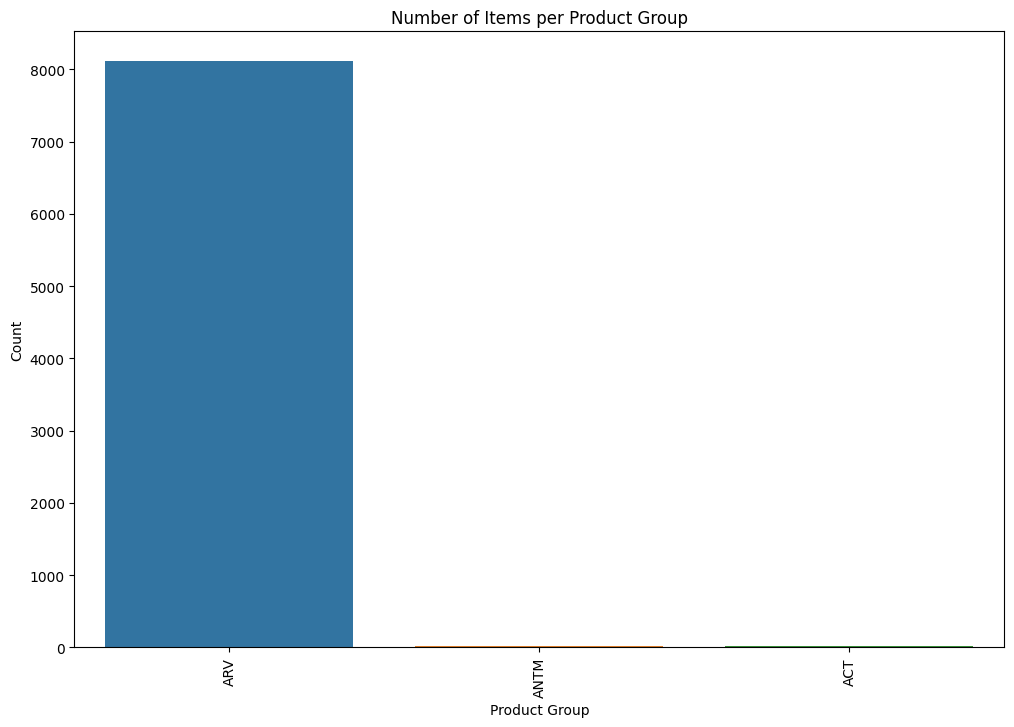

In [18]:
# Bar plot for Product Group
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='Product Group', order=df['Product Group'].value_counts().index)
plt.title('Number of Items per Product Group')
plt.xlabel('Product Group')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

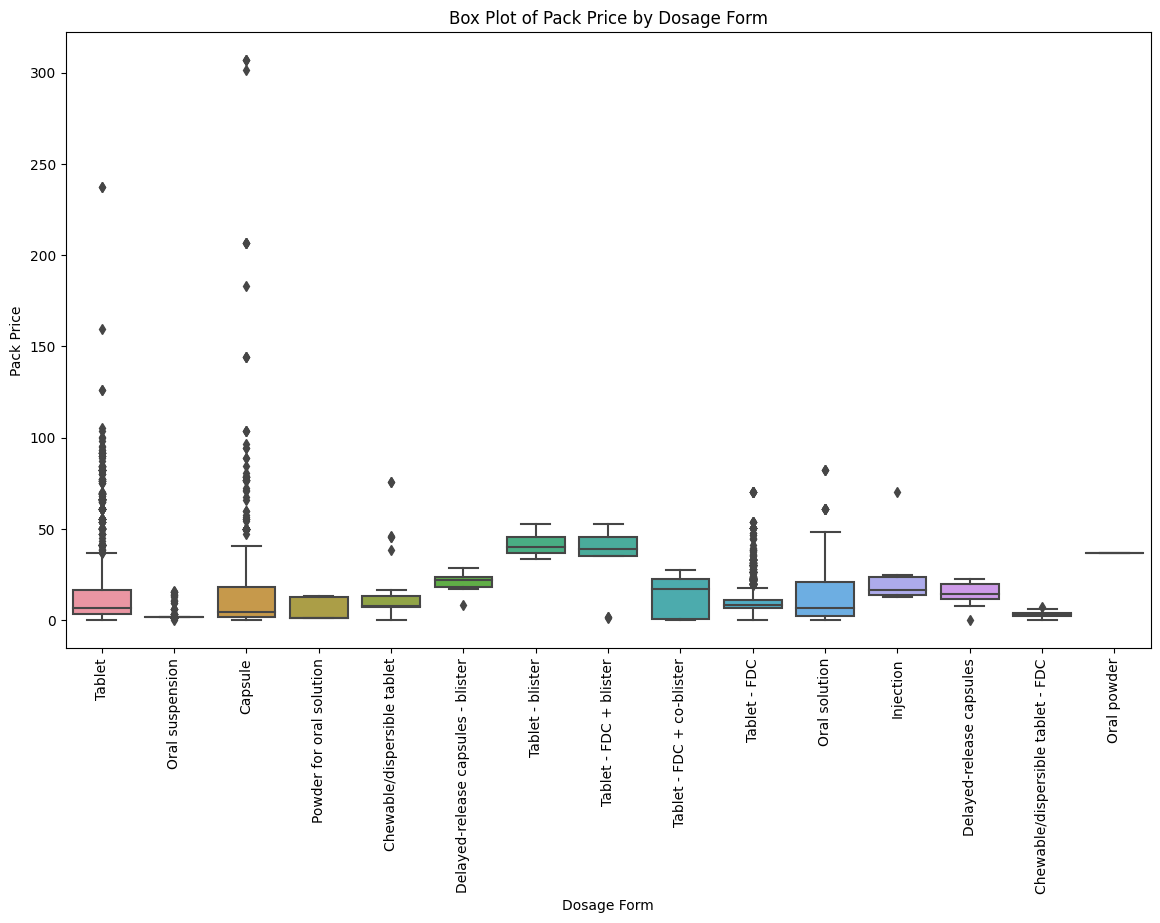

In [19]:
# Box plot for Pack Price by Dosage Form
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='Dosage Form', y='Pack Price')
plt.title('Box Plot of Pack Price by Dosage Form')
plt.xlabel('Dosage Form')
plt.ylabel('Pack Price')
plt.xticks(rotation=90)
plt.show()


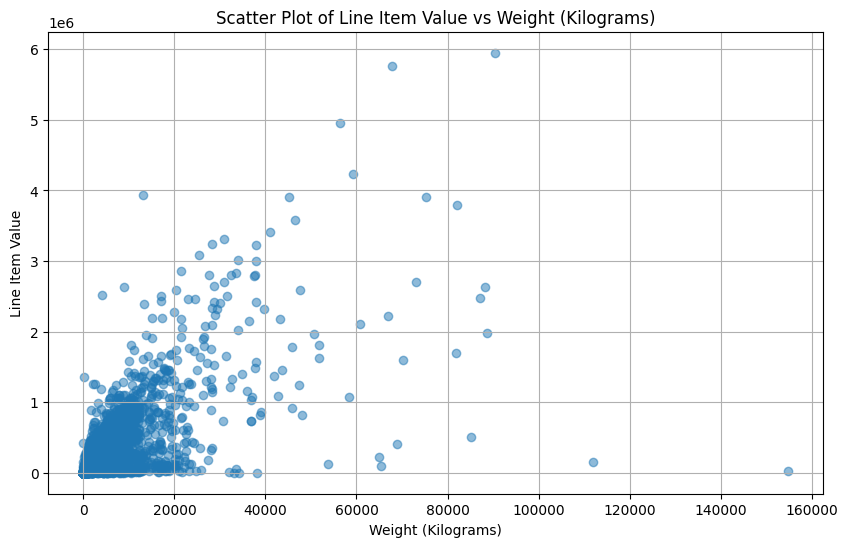

In [20]:
# Convert Weight (Kilograms) to numeric if it's not
df['Weight (Kilograms)'] = pd.to_numeric(df['Weight (Kilograms)'], errors='coerce')

# Scatter plot of Line Item Value vs Weight (Kilograms)
plt.figure(figsize=(10, 6))
plt.scatter(df['Weight (Kilograms)'], df['Line Item Value'], alpha=0.5)
plt.title('Scatter Plot of Line Item Value vs Weight (Kilograms)')
plt.xlabel('Weight (Kilograms)')
plt.ylabel('Line Item Value')
plt.grid(True)
plt.show()


5732 non-convertible dates found and set to NaT


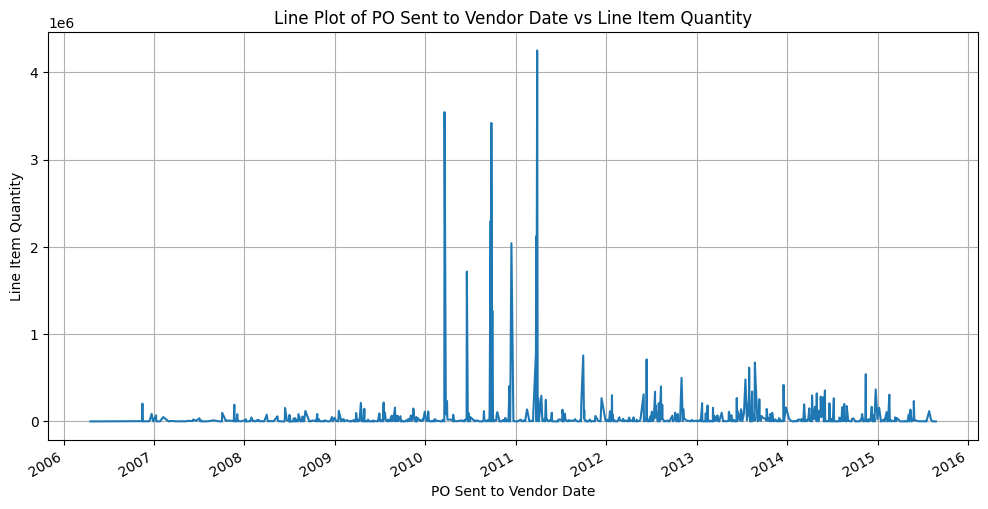

In [21]:
# Load the data
df = pd.read_csv('training_raw_file.csv')

# Convert PO Sent to Vendor Date to datetime, coercing errors
df['PO Sent to Vendor Date'] = pd.to_datetime(df['PO Sent to Vendor Date'], errors='coerce')

# Check for any non-convertible dates that were set to NaT
print(df['PO Sent to Vendor Date'].isna().sum(), "non-convertible dates found and set to NaT")

# Drop rows with NaT values in PO Sent to Vendor Date column
df = df.dropna(subset=['PO Sent to Vendor Date'])

# Line plot of PO Sent to Vendor Date vs Line Item Quantity
plt.figure(figsize=(12, 6))
df.groupby('PO Sent to Vendor Date')['Line Item Quantity'].sum().plot()
plt.title('Line Plot of PO Sent to Vendor Date vs Line Item Quantity')
plt.xlabel('PO Sent to Vendor Date')
plt.ylabel('Line Item Quantity')
plt.grid(True)
plt.show()
